In [7]:
import keras as k
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 58s 5us/step


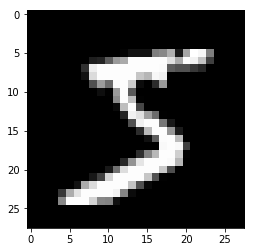

In [9]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # cmap - color map

In [14]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Имеем черно-белое изображение размерностью 28х28 = 784 пикселей (значит входной слой должен содержать 784 нейронов)

In [15]:
X_train[0].shape

(28, 28)

Меняем размерность данных при помощи функции reshape()

In [16]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

Каждый пиксель имеет значение от 0 до 255. Проведение масштабирования (scaling) данных всегда является рекомендуемой процедурой при работе с нейронными сетями.
<p> Проведем нормализацию входных данных от 0 до 1.

In [19]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Так же проведем one-hot-encoding нашей целевой переменной, и превратим число в вектор из 0 и 1 (длина 10).

In [21]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [27]:
num_classes, num_pixels

(10, 784)

In [25]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [24]:
y_train[0].shape

(10,)

### Создание простой нейронной сети с одним скрытым слоем

    входной слой - 784 нейрона (num pixels)
    скрытый слой - 784 нейрона
    выходной слой - 10 нейронов (num classes)

In [41]:
# define baseline model
def baseline_model(input_dim, output_dim):
    # create model
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # выходной слой
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:
model = baseline_model(num_pixels, num_classes)

Обучим созданную нейронную сеть. Метрикой качества выберем accuracy.

In [45]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 3.1982e-04 - acc: 1.0000 - val_loss: 0.0640 - val_acc: 0.9845
Epoch 2/20
 - 5s - loss: 2.6881e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9840
Epoch 3/20
 - 5s - loss: 2.2605e-04 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9843
Epoch 4/20
 - 5s - loss: 1.9928e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9846
Epoch 5/20
 - 5s - loss: 1.7659e-04 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9842
Baseline Error: 1.58%


Получаем baseline error на уровне 1.63%

Сохраняем модель, чтобы не обучать каждый раз.

In [44]:
model.save('mnist_model.h5')

In [53]:
model_json = model.to_json()

with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('model_weights.h5')